In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
import math

In [2]:
pdata,srp = sf.read('13crash.stick.normal.ff.stereo.aif')
tdata,srt = sf.read('TrumpetLa.aif')
vdata,srv = sf.read('ViolinLa.aif')
fdata,srf = sf.read('FluteLa.aif')

In [3]:
piano_time = (np.arange(len(pdata)))/(srp)
flute_time = (np.arange(len(fdata)))/(srf)
trumpet_time = (np.arange(len(tdata)))/(srt)
violin_time = (np.arange(len(vdata)))/(srv)

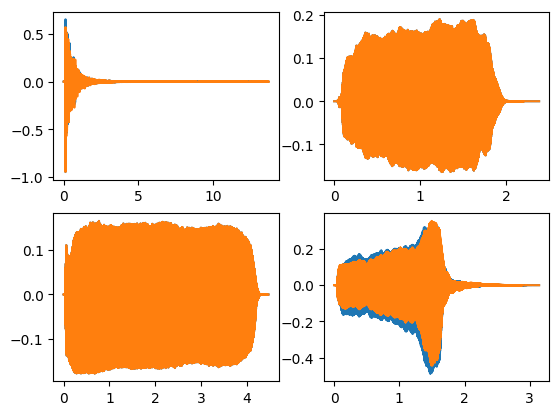

In [4]:
plt.subplot(2,2,1)
plt.plot(piano_time,pdata)
plt.subplot(2,2,2)
plt.plot(flute_time,fdata)
plt.subplot(2,2,3)
plt.plot(trumpet_time,tdata)
plt.subplot(2,2,4)
plt.plot(violin_time,vdata)

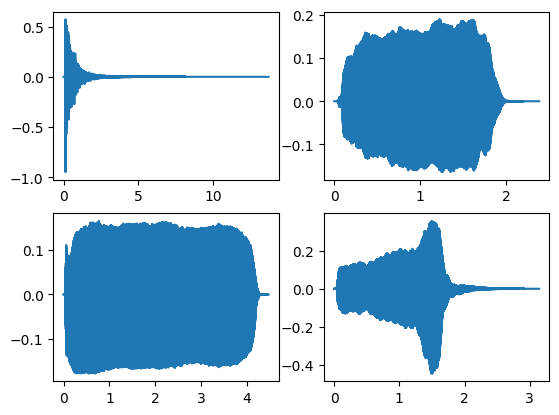

In [5]:
plt.subplot(2,2,1)
plt.plot(piano_time,pdata[:,1])
plt.subplot(2,2,2)
plt.plot(flute_time,fdata[:,1])
plt.subplot(2,2,3)
plt.plot(trumpet_time,tdata[:,1])
plt.subplot(2,2,4)
plt.plot(violin_time,vdata[:,1])

In [6]:
pfreqdata = np.fft.fft(pdata[:,1])
Np = len(pfreqdata)
sr_p = srp/Np
freq_p = np.arange(Np)*sr_p

tfreqdata = np.fft.fft(tdata[:,1])
Nt = len(tfreqdata)
sr_t = srt/Nt
freq_t = np.arange(Nt)*sr_t

vfreqdata = np.fft.fft(vdata[:,1])
Nv = len(vfreqdata)
sr_v = srv/Nv
freq_v = np.arange(Nv)*sr_v

ffreqdata = np.fft.fft(fdata[:,1])
Nf = len(ffreqdata)
sr_f = srf/Nf
freq_f = np.arange(Nf)*sr_f

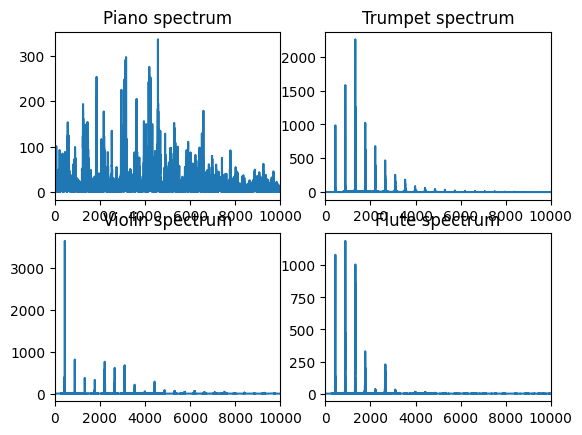

In [7]:
with plt.ion():
    plt.subplot(2,2,4)
    plt.plot(freq_f,np.abs(ffreqdata))
    plt.title('Flute spectrum')
    plt.xlim(0,10000)

    plt.subplot(2,2,3)
    plt.plot(freq_v,np.abs(vfreqdata))
    plt.title('Violin spectrum')
    plt.xlim(0,10000)

    plt.subplot(2,2,2)
    plt.plot(freq_t,np.abs(tfreqdata))
    plt.title('Trumpet spectrum')
    plt.xlim(0,10000)

    plt.subplot(2,2,1)
    plt.plot(freq_p,np.abs(pfreqdata))
    plt.title('Piano spectrum')
    plt.xlim(0,10000)

## Piano Spectrogram

In [8]:
t_hum = 1/10  #1/2 of lower freq limit (in seconds)
Nmin = t_hum*srp
Nwin = int(2**(math.ceil(np.log2(Nmin))-1))  #To make the algorithm 2**n
s = 4 #slide
Ns = math.floor((Np-Nwin)/(Nwin/s))  #Number of windows

pianos = np.zeros((Nwin,Ns),dtype='complex')

In [9]:
#window = np.ones(Nwin)
window = np.hamming(Nwin)
#window = np.hanning(Nwin)

In [10]:
for i in range(Ns-1):
    pianos[:,i] = np.fft.fft(pdata[:,1][i*int(Nwin/s):(i*int(Nwin/s))+Nwin] * window)
#pianos

/tmp/ipykernel_1924/1985763504.py:2: RuntimeWarning: divide by zero encountered in log
  ax.pcolorfast(10*np.log(np.abs(pianos)))   #log scale (in decibels)


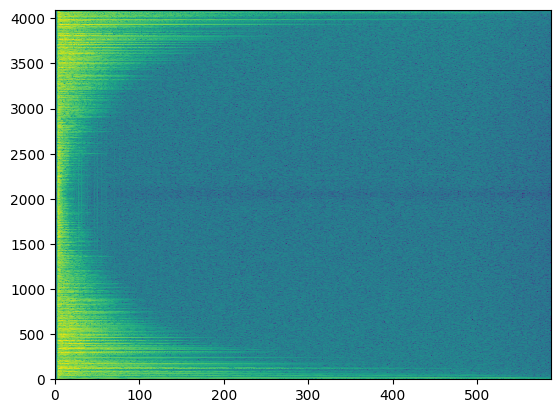

In [11]:
fig,ax = plt.subplots()
ax.pcolorfast(10*np.log(np.abs(pianos)))   #log scale (in decibels)
#plt.colorbar(label='Color Scale')

/tmp/ipykernel_1924/2617198413.py:4: RuntimeWarning: divide by zero encountered in log
  ax.pcolorfast(timesp,freqsp,10*np.log(np.abs(pianos)),vmin=-80)


(0.0, 10000.0)

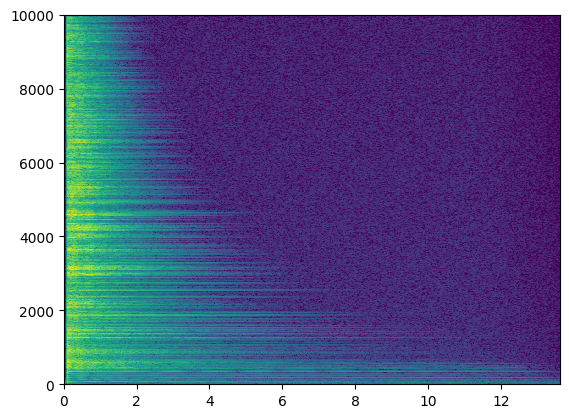

In [12]:
freqsp = np.arange(Nwin)*srp/Nwin
timesp = np.arange(Ns)*Nwin/(s*srp)
fig,ax = plt.subplots()
ax.pcolorfast(timesp,freqsp,10*np.log(np.abs(pianos)),vmin=-80)
ax.set_ylim(0,10000)

## Flute Spectrogram

In [13]:
Nmin_f = t_hum*srf
Nwin_f = int(2**(math.ceil(np.log2(Nmin_f))-1))  #To make the algorithm 2**n
Ns_f = math.floor((Nf-Nwin_f)/(Nwin_f/s))  #Number of windows
flutes = np.zeros((Nwin_f,Ns_f),dtype='complex')

/tmp/ipykernel_1924/3595698147.py:5: RuntimeWarning: divide by zero encountered in log
  ax.pcolorfast(10*np.log(np.abs(flutes)))


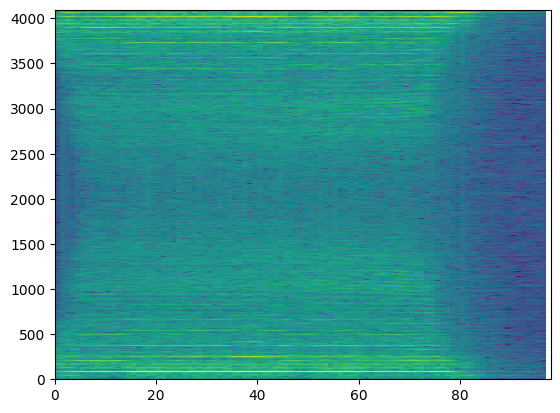

In [14]:
window = np.hamming(Nwin_f)
for i in range(Ns_f-1):
    flutes[:,i] = np.fft.fft(fdata[:,1][i*int(Nwin_f/s):(i*int(Nwin_f/s))+Nwin_f]*window)
fig,ax = plt.subplots()
ax.pcolorfast(10*np.log(np.abs(flutes)))

In [15]:
freqsp_v = np.arange(Nwin_f)*srf/Nwin_f
timesp_v = np.arange(Ns_f)*Nwin_f/(4*srf)
#fig,ax = plt.subplots()
#ax.pcolorfast(timesp_v,freqsp_v,10*np.log(np.abs(flutes)),vmin=-80)
#ax.set_ylim(0,20000)

## Violin Spectrum

/tmp/ipykernel_1924/99480519.py:9: RuntimeWarning: divide by zero encountered in log
  ax.pcolorfast(10*np.log(np.abs(violins)))


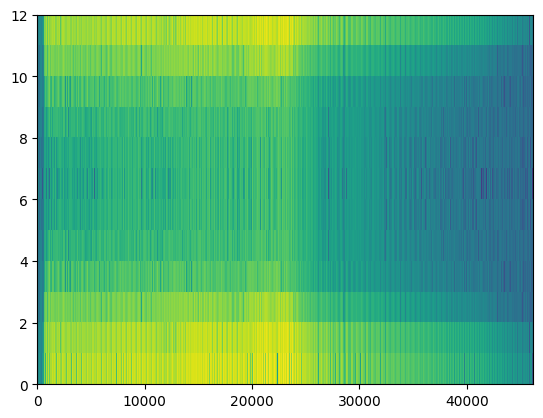

In [16]:
Nmin_v = t_hum*srv
Nwin_v = int(math.ceil(np.log2(Nmin_v)-1))
Ns_v = math.floor((Nv-Nwin_v)/(Nwin_v/s))
violins = np.zeros((Nwin_v,Ns_v),dtype='complex')
window = np.hamming(Nwin_v)
for i in range(Ns_v-1):
    violins[:,i] = np.fft.fft(vdata[:,1][i*int(Nwin_v/s) : int(i*Nwin_v/s)+Nwin_v]*window)
fig,ax = plt.subplots()
ax.pcolorfast(10*np.log(np.abs(violins)))

In [17]:
freq_v = np.arange(Nwin_v)*srv/Nwin_v
time_v = np.arange(Nv)*Nwin_v/(s*srv)
#fig,ax = plt.subplots()
#ax.pcolorfast(time_v,freq_v,10*np.log(np.abs(violins)),vmin=-80)
#ax.set_ylim(0,20000)

## Trumpet Spectrum

/tmp/ipykernel_1924/1074241563.py:9: RuntimeWarning: divide by zero encountered in log
  ax.pcolorfast(10*np.log(np.abs(trumpets)))


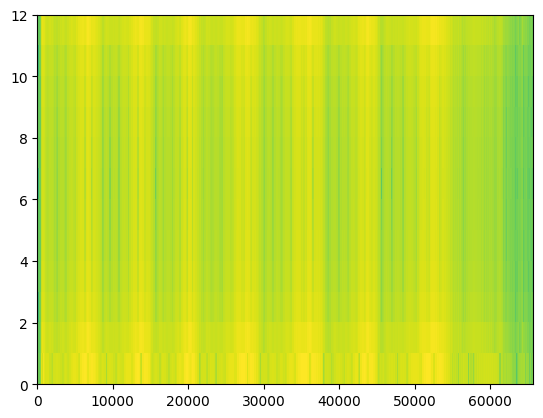

In [18]:
Nmin_t = t_hum*srt
Nwin_t = int(math.ceil(np.log2(Nmin_t)-1))
Ns_t = math.floor((Nt-Nwin_t)/(Nwin_t/s))
trumpets = np.zeros((Nwin_t,Ns_t),dtype='complex')
window = np.hamming(Nwin_t)
for i in range(Ns_t-1):
    trumpets[:,i] = np.fft.fft(tdata[:,1][i*int(Nwin_t/s):i*int(Nwin_t/s)+Nwin_t])
fig,ax = plt.subplots()
ax.pcolorfast(10*np.log(np.abs(trumpets)))

In [19]:
freq_t = np.arange(Nwin_t)*srt/Nwin_t
time_t = np.arange(Nt)*Nwin_t/(s*srt)
#fig,ax = plt.subplots()
#ax.pcolorfast(time_t,freq_t,10*np.log(np.abs(trumpets)),vmin=-80)
#ax.set_ylim(0,30000)

## Spectrums

/tmp/ipykernel_1924/2231000187.py:3: RuntimeWarning: divide by zero encountered in log
  ax[0,0].pcolorfast(timesp,freqsp,10*np.log(np.abs(pianos)),vmin=-80)
/tmp/ipykernel_1924/2231000187.py:7: RuntimeWarning: divide by zero encountered in log
  ax[0,1].pcolorfast(timesp_v,freqsp_v,10*np.log(np.abs(flutes)),vmin=-80)
/tmp/ipykernel_1924/2231000187.py:11: RuntimeWarning: divide by zero encountered in log
  ax[1,0].pcolorfast(time_t,freq_t,10*np.log(np.abs(trumpets)),vmin=-80)
/tmp/ipykernel_1924/2231000187.py:15: RuntimeWarning: divide by zero encountered in log
  ax[1,1].pcolorfast(time_v,freq_v,10*np.log(np.abs(violins)),vmin=-80)


Text(0.5, 1.0, 'Violin')

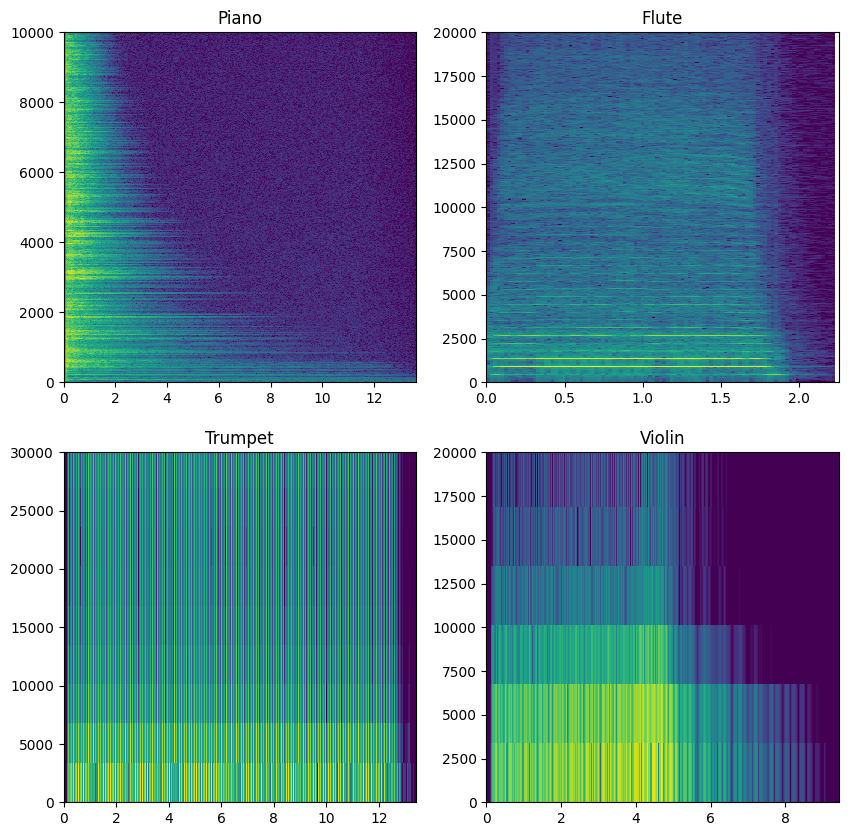

In [20]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
#plt.subplot(2,2,1)
ax[0,0].pcolorfast(timesp,freqsp,10*np.log(np.abs(pianos)),vmin=-80)
ax[0,0].set_ylim(0,10000)
ax[0,0].set_title('Piano')

ax[0,1].pcolorfast(timesp_v,freqsp_v,10*np.log(np.abs(flutes)),vmin=-80)
ax[0,1].set_ylim(0,20000)
ax[0,1].set_title('Flute')

ax[1,0].pcolorfast(time_t,freq_t,10*np.log(np.abs(trumpets)),vmin=-80)
ax[1,0].set_ylim(0,30000)
ax[1,0].set_title('Trumpet')

ax[1,1].pcolorfast(time_v,freq_v,10*np.log(np.abs(violins)),vmin=-80)
ax[1,1].set_ylim(0,20000)
ax[1,1].set_title('Violin')